In [3]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from sklearn.preprocessing import LabelEncoder
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_curve, auc
import yellowbrick as yb 
import missingno
path ="../kaggle/titanic_tutorial/train.csv"
df = pd.read_csv(path)

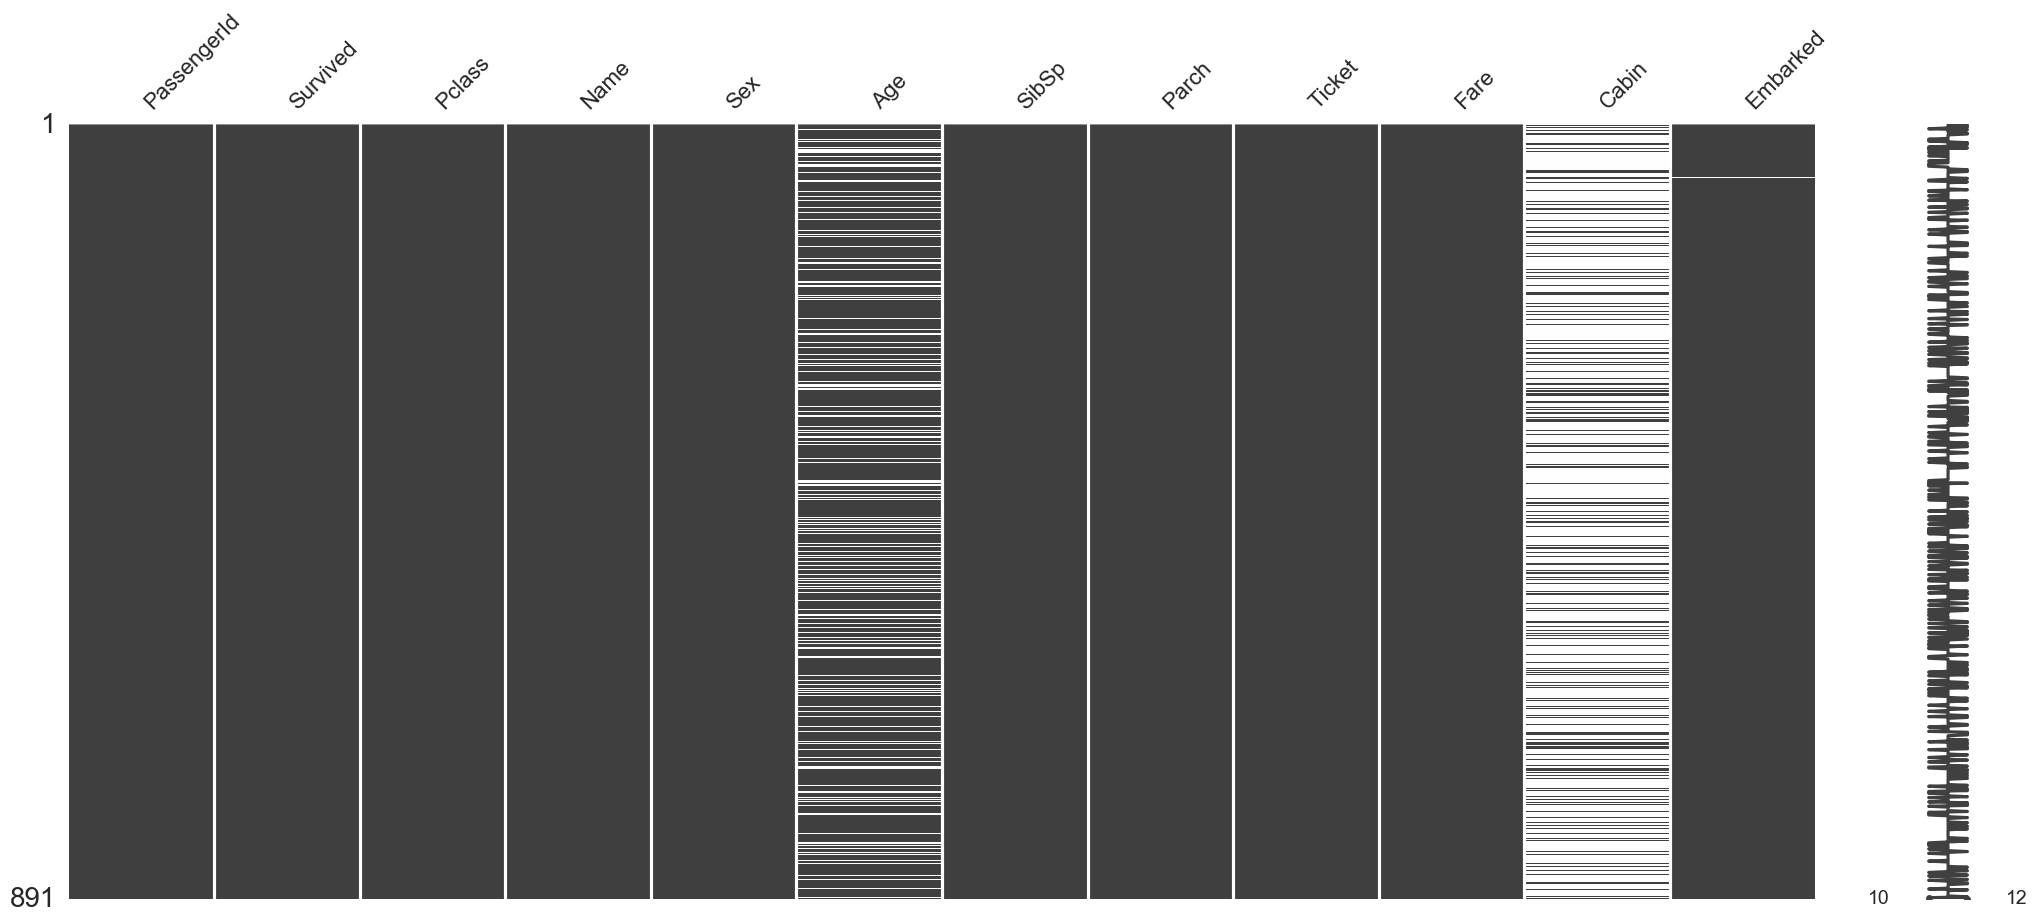

In [4]:
missingno.matrix(df)

In [5]:
from pandas_profiling import ProfileReport

In [6]:
ProfileReport(df)

Number of variables,12
Number of observations,891
Total Missing (%),8.1%
Total size in memory,83.6 KiB
Average record size in memory,96.1 B
Numeric,7
Categorical,4
Date,0
Text (Unique),1
Rejected,0
Distinct count,89


In [8]:
y = df.Survived

In [11]:
features_crop = df[['Pclass', 'Sex', "Age", "SibSp", "Fare", "Embarked"]]

In [21]:
sex = pd.get_dummies(features_crop.Sex)
embarked = pd.get_dummies(features_crop.Embarked)
siblings = pd.get_dummies(features_crop.SibSp)
X = pd.concat([features_crop[['Pclass', "Age", "Fare"]], sex, embarked, siblings], axis=1)

In [27]:
av_age = X.Age.dropna().median()

In [29]:
X.Age = X.Age.fillna(av_age)

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
# Classifier Evaluation Imports 

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report
from yellowbrick.classifier import ClassificationReport, ROCAUC, ClassBalance

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, )

In [53]:
def fit_and_test_model(cls, train_X, train_y, test_X, test_y):
    """This is a framework to fit and test models against the training data"""
    mod = cls.fit(train_X, train_y)
    predictions = mod.predict(test_X)
    
    print classification_report(y_true=test_y, y_pred=predictions)
    
    #
    vis = ROCAUC(cls)
    vis.fit(X_train, y_train)  # Fit the training data to the visualizer
    vis.score(X_test, y_test)  # Evaluate the model on the test data 
    g = vis.poof()             # Draw/show/poof the data

             precision    recall  f1-score   support

          0       0.78      0.75      0.77       134
          1       0.65      0.67      0.66        89

avg / total       0.72      0.72      0.72       223



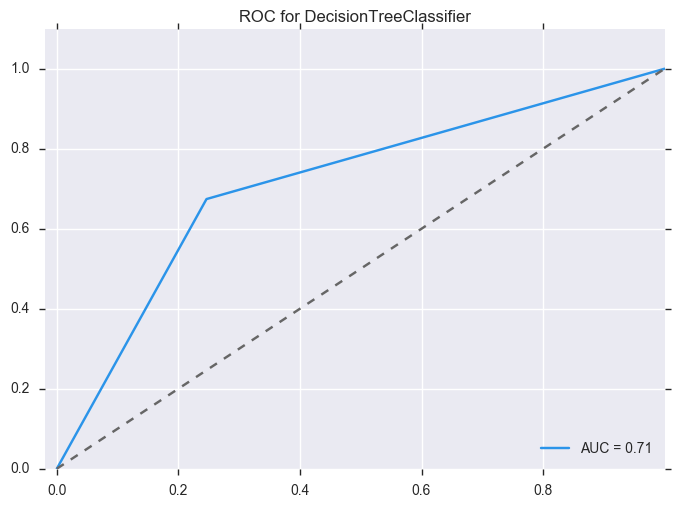

In [54]:
cls = DecisionTreeClassifier()
fit_and_test_model(cls, X_train, y_train, X_test, y_test)

             precision    recall  f1-score   support

          0       0.82      0.82      0.82       134
          1       0.73      0.73      0.73        89

avg / total       0.78      0.78      0.78       223



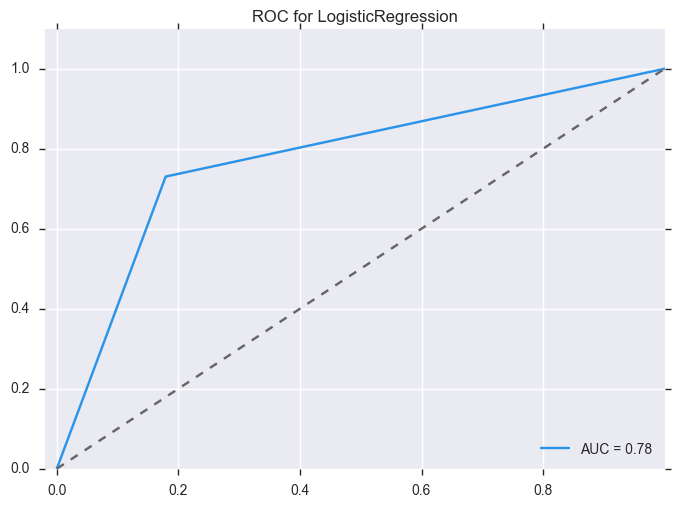

In [56]:
from sklearn.linear_model import LogisticRegression
cls2 = LogisticRegression()
fit_and_test_model(cls2, X_train, y_train, X_test, y_test)

             precision    recall  f1-score   support

          0       0.70      0.94      0.80       134
          1       0.81      0.39      0.53        89

avg / total       0.75      0.72      0.69       223



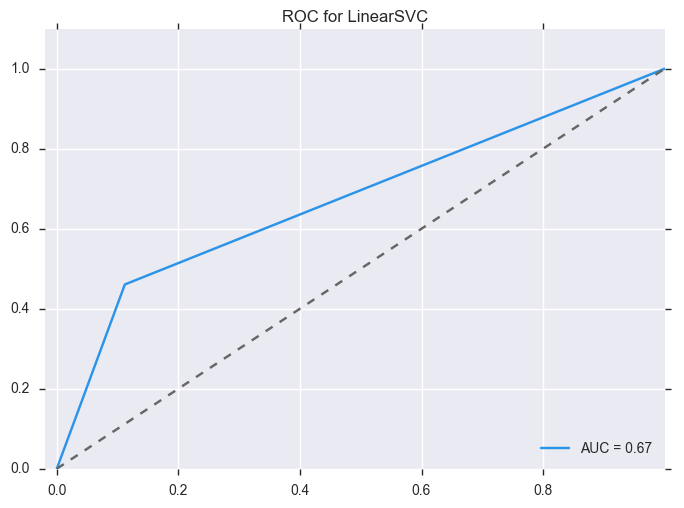

In [57]:
from sklearn.svm import LinearSVC, NuSVC, SVC
ln_svc = LinearSVC()
fit_and_test_model(ln_svc, X_train, y_train, X_test, y_test)

             precision    recall  f1-score   support

          0       0.74      0.79      0.77       134
          1       0.65      0.58      0.62        89

avg / total       0.70      0.71      0.71       223



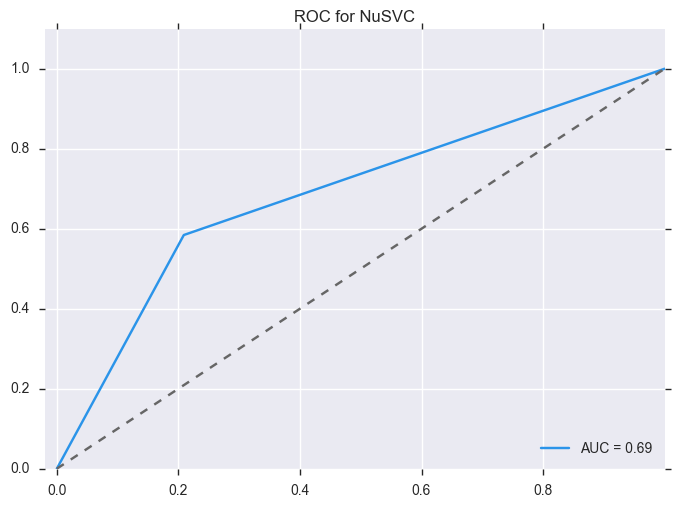

In [58]:
nu_svc = NuSVC()
fit_and_test_model(nu_svc, X_train, y_train, X_test, y_test)

In [59]:
from sklearn.ensemble import AdaBoostClassifier, \
        BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier

In [60]:
ada = AdaBoostClassifier()
bag = BaggingClassifier()
et = ExtraTreesClassifier()
gb = GradientBoostingClassifier()
rfc = RandomForestClassifier()


             precision    recall  f1-score   support

          0       0.84      0.84      0.84       134
          1       0.76      0.75      0.76        89

avg / total       0.81      0.81      0.81       223



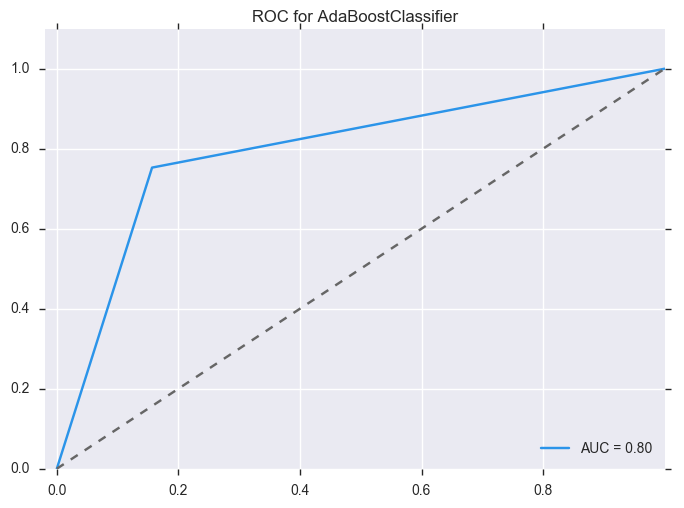

In [61]:
fit_and_test_model(ada, X_train, y_train, X_test, y_test)

             precision    recall  f1-score   support

          0       0.81      0.82      0.82       134
          1       0.73      0.72      0.72        89

avg / total       0.78      0.78      0.78       223



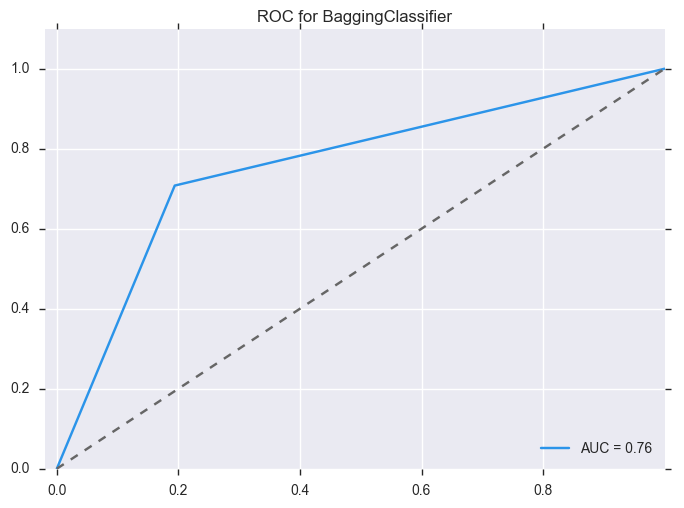

In [62]:
fit_and_test_model(bag, X_train, y_train, X_test, y_test)

             precision    recall  f1-score   support

          0       0.79      0.81      0.80       134
          1       0.70      0.69      0.69        89

avg / total       0.76      0.76      0.76       223



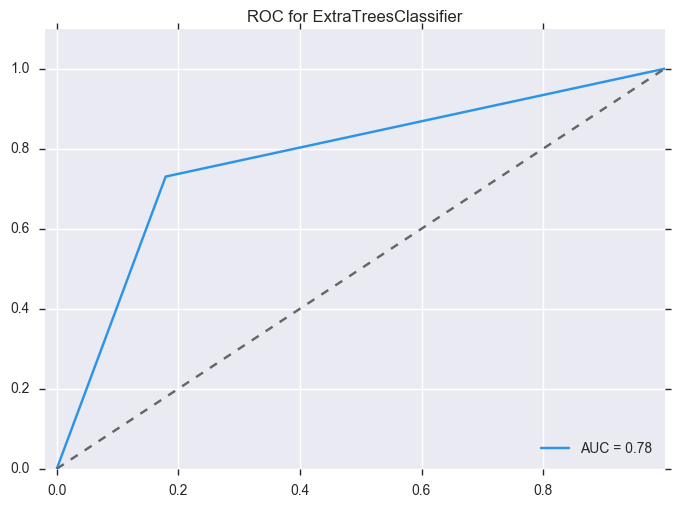

In [63]:
fit_and_test_model(et, X_train, y_train, X_test, y_test)

             precision    recall  f1-score   support

          0       0.82      0.90      0.85       134
          1       0.82      0.70      0.75        89

avg / total       0.82      0.82      0.81       223



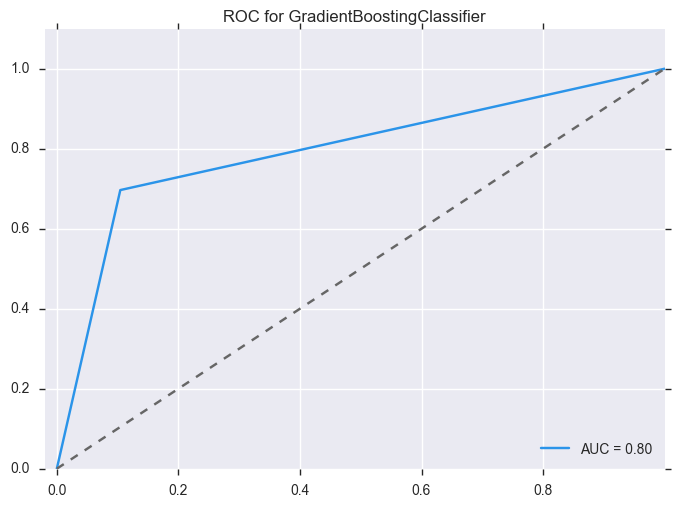

In [64]:
fit_and_test_model(gb, X_train, y_train, X_test, y_test)

             precision    recall  f1-score   support

          0       0.82      0.81      0.81       134
          1       0.71      0.73      0.72        89

avg / total       0.78      0.78      0.78       223



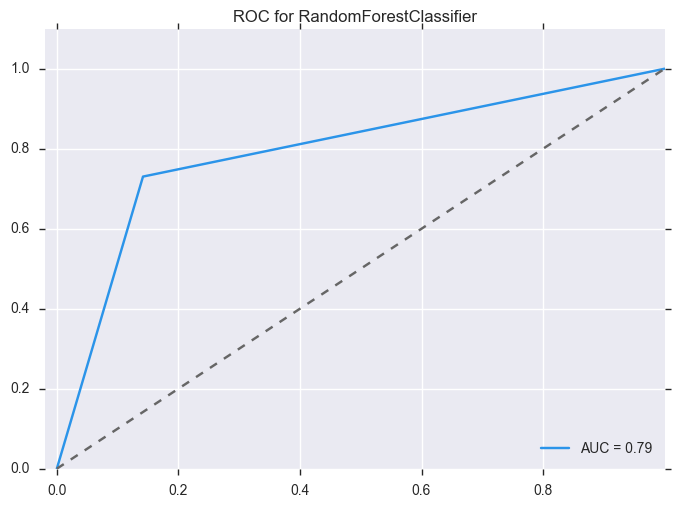

In [65]:
fit_and_test_model(rfc, X_train, y_train, X_test, y_test)